# Data Science Online - Week#1

## *Think about using `Numpy` for all solutions. Also please use your own solutions and compare the results. Always discuss your solutions.*

## Titanic Dataset

https://www.kaggle.com/c/titanic/overview

1. Please download the dataset from the link above including `train.csv` and `test.csv`

2. Use `numpy` to answer all the following questions. No `pandas` please.

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Step 1: Load files `train.csv` and `test.csv` into two different numpy arrays, named `train_np` and `test_np`

### Step 2: How many rows and how many columns in each dataset?

### Step 3: Which columns are categorical and which columns are numerical?

### Step 4: Which columns contain blank, null or empty values?

### Step 5: Check data types of each numerical column.

### Step 6: Calculate `mean`, `mode`, `median`, `max`, `min` and `variance` of numerical columns? (again, use two methods: your own method and `numpy` functions. Compare processing time of each method). If you don't know what do `mean`, `mode`, `median`, `max`, `min`  and `variance` mean, please slack us.

### Step 7: What is the percentage of survival? What are the percentages of male and female?

## Another dataset

https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

### Step 1. How many products cost more than $10.00?

### Step 2. Sort by the name of the item

### Step 3. What was the quantity of the most expensive item ordered?

### Step 4. How many times was a Veggie Salad Bowl ordered?

### Step 5. How many times did someone order more than one Canned Soda?

### Step 6. Create a histogram of the top 5 items bought (If you don't know what does histogram means, please slack us)

### Step 7. Create a scatterplot with the number of items orderered per order price (Price should be in the X-axis and Items ordered in the Y-axis)

### Another dataset

`us_crime_rates_1960_2014.csv`

### Step 1. What is the most dangerous decade to live in the US?

### Other Problems

1. How do you find the maximum and minimum of a function? Discuss all different methods you can think of.

2. Given a function f(x) =  3*x^2 + 2*x + 3. Please find x so that f(x) is minimum. Using all the methods discussed about. Compare results.

3. One of the way to find the solution for the above problem is `Gradient Descent`. Please discuss about that and implement it by using `numpy`. Please slack us if you could not find any document about `Gradient Descent`.

4. Use OOP to implement `Gradient Descent` if you haven't done so.

### Another Problem

Generate 100 samples (x_i, y_i) by using the following equation y_i = 3*x_i + 2 + noise (normal with mean = 1, variance = 3) (https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)



* Plot (x, y) by using scatterplot.

* Find (a, b) such that the following is minimum. 

\begin{equation*}
 \sum_{k=1}^{100} \left(a x_i + b - y_i \right)^2 
\end{equation*}

* Use `Gradient Descent` if you haven't done so.

# Titanic Dataset

### Step 1: Load files `train.csv` and `test.csv` into two different numpy arrays, named `train_np` and `test_np`

#### Load file test.csv into different numpy array

In [115]:
import csv
import numpy as np

with open('test.csv', 'r') as file:
    test_np = list(csv.reader(file))

test_np = np.array(test_np)

In [114]:
print(test_np)

[['PassengerId' 'Pclass' 'Name' ... 'Fare' 'Cabin' 'Embarked']
 ['892' '3' 'Kelly, Mr. James' ... '7.8292' '' 'Q']
 ['893' '3' 'Wilkes, Mrs. James (Ellen Needs)' ... '7' '' 'S']
 ...
 ['1307' '3' 'Saether, Mr. Simon Sivertsen' ... '7.25' '' 'S']
 ['1308' '3' 'Ware, Mr. Frederick' ... '8.05' '' 'S']
 ['1309' '3' 'Peter, Master. Michael J' ... '22.3583' '' 'C']]


#### Load file train.csv to different numpy array

In [5]:
import csv
import numpy as np

with open('train.csv', 'r') as file_1:
    train_np = list(csv.reader(file_1))

train_np = np.array(train_np)

In [8]:
print(train_np)

[['PassengerId' 'Survived' 'Pclass' ... 'Fare' 'Cabin' 'Embarked']
 ['1' '0' '3' ... '7.25' '' 'S']
 ['2' '1' '1' ... '71.2833' 'C85' 'C']
 ...
 ['889' '0' '3' ... '23.45' '' 'S']
 ['890' '1' '1' ... '30' 'C148' 'C']
 ['891' '0' '3' ... '7.75' '' 'Q']]


In [9]:
print(test_np.shape)  # Show the number of rows and columns

(419, 11)


### Step 2: How many rows and how many columns in each dataset?

In [10]:
# Show the number of rows and columns

print(test_np.shape)
print(train_np.shape)

(419, 11)
(892, 12)


#### There are 419 rows and 11 columns in test dataset
#### There are 892 rows and 12 columns in train dataset

### Step 3: Which columns are categorical and which columns are numerical?

In [11]:
test_np == test_np[0, :]

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
print(test_np.shape)

(419, 11)


In [13]:
print(test_np.shape[0])

419


In [14]:
# Check columns are categorical or numerical.
def check_categorical_numeric(matrix):
    for elements in np.nditer(matrix, flags = ['external_loop'], order = 'F'):
        check_categorical = False
        
        # Continue loop column name
        for i in range(1, len(elements)):
            if(len(elements[i]) == 0):
                continue
            # If element of column have any character --> This column has categorical value
            if((any(character.isalpha() for character in elements[i])) == True):
                check_categorical = True
                break

        if(check_categorical == False):
            print('The column {} are NUMERICAL'.format(elements[0]))
        else:
            print('The colum {} are CATEGORICAL'.format(elements[0]))
            
check_categorical_numeric(test_np)

The column PassengerId are NUMERICAL
The column Pclass are NUMERICAL
The colum Name are CATEGORICAL
The colum Sex are CATEGORICAL
The column Age are NUMERICAL
The column SibSp are NUMERICAL
The column Parch are NUMERICAL
The colum Ticket are CATEGORICAL
The column Fare are NUMERICAL
The colum Cabin are CATEGORICAL
The colum Embarked are CATEGORICAL


### Step 4: Which columns contain blank, null or empty values?

In [15]:
# Check columns contain blank, null or empty values
def check_blank_null_empty(matrix):
    for elements in np.nditer(matrix, flags = ['external_loop'], order = 'F'):
        check = False
        
        for value in elements:
            if(len(value) == 0):
                check = True
                break
        
        if(check == True):
            print('The column {} CONTAINS blank, null or empty values'.format(elements[0]))
        else:
            print('The column {} DO NOT have blank, null or empty values '.format(elements[0]))
            
check_blank_null_empty(test_np)

The column PassengerId DO NOT have blank, null or empty values 
The column Pclass DO NOT have blank, null or empty values 
The column Name DO NOT have blank, null or empty values 
The column Sex DO NOT have blank, null or empty values 
The column Age CONTAINS blank, null or empty values
The column SibSp DO NOT have blank, null or empty values 
The column Parch DO NOT have blank, null or empty values 
The column Ticket DO NOT have blank, null or empty values 
The column Fare CONTAINS blank, null or empty values
The column Cabin CONTAINS blank, null or empty values
The column Embarked DO NOT have blank, null or empty values 


### Step 5: Check data types of each numerical column.

In [16]:
def check_int_number(string):
    try:
        int(string)
        return True
    except:
        return False
        
def data_types_numerical_column(matrix):
    # Check numerical column
    for elements in np.nditer(matrix, flags = ['external_loop'], order = 'F'):
        check_categorical = False
        
        # Continue loop column name
        for i in range(1, len(elements)):
            if(len(elements[i]) == 0):
                continue
            # If element of column have any character --> This column has categorical value
            if((any(character.isalpha() for character in elements[i])) == True):
                check_categorical = True
                break
                
    ######################################           
    # Check data types of numerical column
        if(check_categorical == False):
            
            check_float = False
            check_int = False
            for i in range(1, len(elements)):
                if(len(elements[i]) == 0):
                    continue
                if(elements[i].find('.') != -1):
                    check_float = True
                if(check_int_number(elements[i]) == True):
                    check_int = True
                    
            if(check_float and check_int):
                print('The column {} has 2 values data types: INT and FLOAT'.format(elements[0]))
            elif(check_float and check_int == False):
                print('The column {} has 1 value data types: FLOAT'.format(elements[0]))
            else:
                print('The column {} has 1 value data types: INT'.format(elements[0]))


In [17]:
data_types_numerical_column(test_np)

The column PassengerId has 1 value data types: INT
The column Pclass has 1 value data types: INT
The column Age has 2 values data types: INT and FLOAT
The column SibSp has 1 value data types: INT
The column Parch has 1 value data types: INT
The column Fare has 2 values data types: INT and FLOAT


### Step 6: Calculate `mean`, `mode`, `median`, `max`, `min` and `variance` of numerical columns? (again, use two methods: your own method and `numpy` functions. Compare processing time of each method). If you don't know what do `mean`, `mode`, `median`, `max`, `min`  and `variance` mean, please slack us.

### Step 7: What is the percentage of survival? What are the percentages of male and female?

#### Percentage of survival

In [18]:
def percentage_survival(np_array):
    count_death = 0
    count_survival = 0
    for elements in np.nditer(np_array, flags = ['external_loop'], order = 'F'):
        if(elements[0] == 'Survived'):
            for i in range(1, len(elements)):
                
                if(len(elements[i]) == 0):
                    continue
                if(elements[i] == '0'):
                    count_survival += 1
                elif(elements[i] == '1'):
                    count_death += 1

    percentage_death = count_death / count_survival * 100
    percentage_survival = 100 - percentage_death
    
    print('Percentage of survival is {0:.2f}%'.format(percentage_survival))
    print('Percentage of death is {0:.2f}%'.format(percentage_death))

percentage_survival(train_np)

Percentage of survival is 37.70%
Percentage of death is 62.30%


#### Percentages of male and female

In [19]:
def percentage_male_female(np_array):
    count_female = 0
    count_male = 0
    for elements in np.nditer(np_array, flags = ['external_loop'], order = 'F'):
        if(elements[0] == 'Sex'):
            for i in range(1, len(elements)):
                if(len(elements[i]) == 0):
                    continue
                if(elements[i].lower() == 'male'):
                    count_male += 1
                else:
                    count_female += 1
                    
    if(count_male < count_female):
        percentage = count_male / count_female * 100
        print('Percentage male / female in dataset is: {0:.2f}%'.format(percentage))
    else:
        percentage = count_female / count_male * 100
        print('Percentage female / male in dataset is: {0:.2f}%'.format(percentage))


percentage_male_female(test_np)
percentage_male_female(train_np)

Percentage female / male in dataset is: 57.14%
Percentage female / male in dataset is: 54.42%


## Another dataset

https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

### Load file chipotle to different numpy array

In [1]:
import requests


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
r = requests.get(url, allow_redirects=True)

In [2]:
import csv
with open('chipotle.tsv', 'r') as file_2:
    chipotle_np = list(csv.reader(file_2))

In [3]:
import numpy as np
chipotle_np = np.array(chipotle_np)

In [4]:
print(chipotle_np)

[list(['order_id\tquantity\titem_name\tchoice_description\titem_price'])
 list(['1\t1\tChips and Fresh Tomato Salsa\tNULL\t$2.39 '])
 list(['1\t1\tIzze\t[Clementine]\t$3.39 ']) ...
 list(['1834\t1\tChicken Salad Bowl\t[Fresh Tomato Salsa', ' [Fajita Vegetables', ' Pinto Beans', ' Guacamole', ' Lettuce]]\t$11.25 '])
 list(['1834\t1\tChicken Salad Bowl\t[Fresh Tomato Salsa', ' [Fajita Vegetables', ' Lettuce]]\t$8.75 '])
 list(['1834\t1\tChicken Salad Bowl\t[Fresh Tomato Salsa', ' [Fajita Vegetables', ' Pinto Beans', ' Lettuce]]\t$8.75 '])]


### Step 1. How many products cost more than $10.00?

In [5]:
def products_cost_more_10(numpy_array):
    count = 0
    for i in range(1, len(numpy_array)):
        temp = numpy_array[i][-1].split('\t')
        cost = temp[-1]
        if(float(cost[1:]) > 10.00):
            count += 1
    print('There are {} products cost more than $10.00'.format(count))
        
products_cost_more_10(chipotle_np)

There are 1130 products cost more than $10.00


### Step 2. Sort by the name of the item

In [6]:
def sort_by_the_name(numpy_array):
    temp_array = []
    for i in range(1, len(numpy_array)):
        temp = numpy_array[i][0].split('\t')
        
        if len(temp[2]) == 0:
            continue
        temp_array.append(temp[2])
    
    item_name = []
    for string in temp_array:
        if string not in item_name:
            item_name.append(string)
    
    item_name.sort()
    for name in item_name:
        print(name)
    
sort_by_the_name(chipotle_np)

6 Pack Soft Drink
Barbacoa Bowl
Barbacoa Burrito
Barbacoa Crispy Tacos
Barbacoa Salad Bowl
Barbacoa Soft Tacos
Bottled Water
Bowl
Burrito
Canned Soda
Canned Soft Drink
Carnitas Bowl
Carnitas Burrito
Carnitas Crispy Tacos
Carnitas Salad
Carnitas Salad Bowl
Carnitas Soft Tacos
Chicken Bowl
Chicken Burrito
Chicken Crispy Tacos
Chicken Salad
Chicken Salad Bowl
Chicken Soft Tacos
Chips
Chips and Fresh Tomato Salsa
Chips and Guacamole
Chips and Mild Fresh Tomato Salsa
Chips and Roasted Chili Corn Salsa
Chips and Roasted Chili-Corn Salsa
Chips and Tomatillo Green Chili Salsa
Chips and Tomatillo Red Chili Salsa
Chips and Tomatillo-Green Chili Salsa
Chips and Tomatillo-Red Chili Salsa
Crispy Tacos
Izze
Nantucket Nectar
Salad
Side of Chips
Steak Bowl
Steak Burrito
Steak Crispy Tacos
Steak Salad
Steak Salad Bowl
Steak Soft Tacos
Veggie Bowl
Veggie Burrito
Veggie Crispy Tacos
Veggie Salad
Veggie Salad Bowl
Veggie Soft Tacos


### Step 3. What was the quantity of the most expensive item ordered?

In [49]:
def the_most_expensive_item(numpy_array):
    count = 0
    max = 0
    index = -1
    for i in range(1, len(numpy_array)):
        # Find the most expensive item
        temp = numpy_array[i][-1].split('\t')       
        cost = temp[-1]
        if(len(cost[1:]) == 0):
            continue
        if(float(cost[1:]) > max):
            max = float(cost[1:])
            index = i
    the_most_expensive_item = numpy_array[index][0].split('\t')[2]
    
    for i in range(1, len(numpy_array)):
        # Find quantity of the most epensive item
        temp = numpy_array[i][0].split('\t')
        quantity = int(temp[1])
        item_name = temp[2]
        if item_name == the_most_expensive_item:
            count += quantity
    print('The quantity of the most expensive item ordered is {} and the quantity is {}.'.format(the_most_expensive_item.upper(), count))        

the_most_expensive_item(chipotle_np)

The quantity of the most expensive item ordered is CHIPS AND FRESH TOMATO SALSA and the quantity is 130.


### Step 4. How many times was a Veggie Salad Bowl ordered?

In [8]:
def times_veggie_salad_bowl(numpy_array):
    count = 0
    for i in range(1, len(numpy_array)):
        temp = numpy_array[i][0].split('\t')
        if temp[2] == 'Veggie Salad Bowl':
            count += 1
    print('There are {} times was a Veggie Salad Bowl ordered'.format(count))

times_veggie_salad_bowl(chipotle_np)

There are 18 times was a Veggie Salad Bowl ordered


### Step 5. How many times did someone order more than one Canned Soda?

In [9]:
def order_than_one_Canned_Soda(numpy_array):
    count = 0
    for i in range(1, len(numpy_array)):
        temp = numpy_array[i][0].split('\t')
        quantity = int(temp[1])
        item_name = temp[2]
        if quantity > 1 and item_name == 'Canned Soda':
            count += 1
            
    print('There are {} times which someone ordered more than one Canned Soda'.format(count))
order_than_one_Canned_Soda(chipotle_np)

There are 20 times which someone ordered more than one Canned Soda


### Step 6. Create a histogram of the top 5 items bought (If you don't know what does histogram means, please slack us)

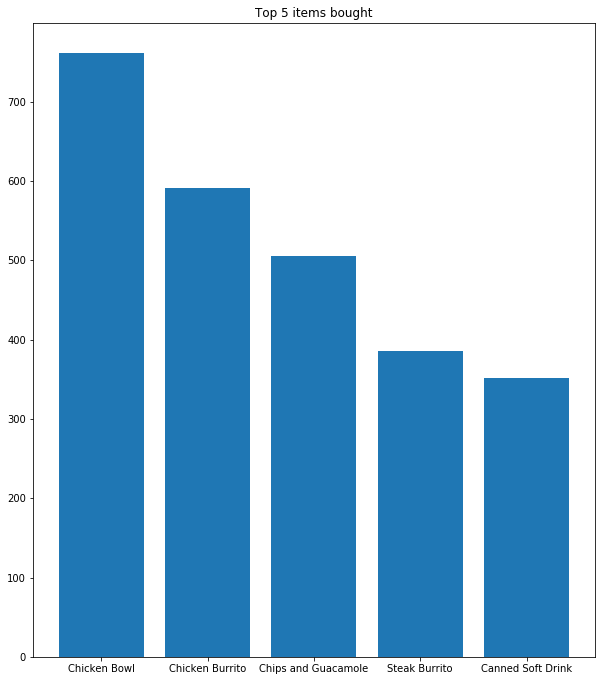

In [80]:
import matplotlib.pyplot as plt

def histogram_top_5_items(numpy_array):
    dictionary = dict()
    for i in range(1, len(numpy_array)):
        # Handling item name and quantity
        temp = numpy_array[i][0].split('\t')
        item_name = temp[2]
        item_quantity = int(temp[1])
        
        # Add item name and item quantity to dictionary
        dictionary[item_name] = dictionary.get(item_name, 0) + item_quantity
    
    # Find top 5 items bought
    iter = 0
    sorted_dict = {key: value for key, value in sorted(dictionary.items(), key=lambda item: item[1], reverse = True)}
    result_array = []
    for key in sorted_dict:
        if(iter == 5):
            break
        iter += 1
        result_array .append((key, sorted_dict[key]))
        
    # Calculating parameter of plt.bar    
    labels = [item[0] for item in result_array]
    quantity = [item[1] for item in result_array]    
    nbars = len(result_array)
    fig = plt.figure(figsize = [7.8, 8.8])
    ax = fig.add_axes([1, 1, 1, 1])
    ax.bar(np.arange(nbars), quantity, tick_label=labels, width = 0.8)
    plt.title('Top 5 items bought')
    plt.show()
    
histogram_top_5_items(chipotle_np)

### Step 7. Create a scatterplot with the number of items orderered per order price (Price should be in the X-axis and Items ordered in the Y-axis)

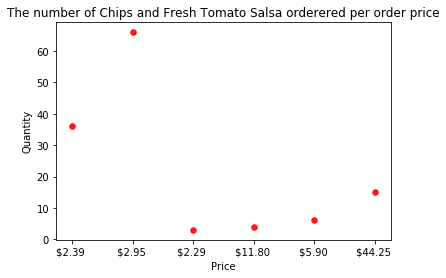

In [112]:
def scatterplot(numpy_array, check_item_name):
    dictionary = dict()
    
    # Find quantity of item follows price.
    for i in range(1, len(numpy_array)):
        item_name = numpy_array[i][0].split('\t')[2]
        item_quantity = int(numpy_array[i][0].split('\t')[1])
        item_price = numpy_array[i][-1].split('\t')[-1]
        
        if(item_name == check_item_name):
            dictionary[item_price] = dictionary.get(item_price, 0) + item_quantity
    
    # Input data
    x = [item[0] for item in dictionary.items()]
    y = [item[1] for item in dictionary.items()]
    colors = ("red")
    
    plt.title('The number of {} orderered per order price'.format(check_item_name))
    plt.xlabel('Price')
    plt.ylabel('Quantity')
    plt.scatter(x, y, s=30, c=colors, alpha=0.9)
    plt.show()
    
scatterplot(chipotle_np, 'Chips and Fresh Tomato Salsa')

### Another dataset

`us_crime_rates_1960_2014.csv`

### Step 1. What is the most dangerous decade to live in the US?

In [1]:
import csv
import numpy as np

with open('us_crime_rates_1960_2014.csv', 'r') as file:
    us_crime = list(csv.reader(file))

us_crime = np.array(us_crime)
print(us_crime)

[['Year' 'Population' 'Total' 'Violent' 'Property' 'Murder'
  'Forcible_Rape' 'Robbery' 'Aggravated_assault' 'Burglary'
  'Larceny_Theft' 'Vehicle_Theft']
 ['1960' '179323175' '3384200' '288460' '3095700' '9110' '17190' '107840'
  '154320' '912100' '1855400' '328200']
 ['1961' '182992000' '3488000' '289390' '3198600' '8740' '17220' '106670'
  '156760' '949600' '1913000' '336000']
 ['1962' '185771000' '3752200' '301510' '3450700' '8530' '17550' '110860'
  '164570' '994300' '2089600' '366800']
 ['1963' '188483000' '4109500' '316970' '3792500' '8640' '17650' '116470'
  '174210' '1086400' '2297800' '408300']
 ['1964' '191141000' '4564600' '364220' '4200400' '9360' '21420' '130390'
  '203050' '1213200' '2514400' '472800']
 ['1965' '193526000' '4739400' '387390' '4352000' '9960' '23410' '138690'
  '215330' '1282500' '2572600' '496900']
 ['1966' '195576000' '5223500' '430180' '4793300' '11040' '25820'
  '157990' '235330' '1410100' '2822000' '561200']
 ['1967' '197457000' '5903400' '499930' '5

In [11]:
def the_most_dangerous_decade(np_array):
    temp_lst = []
    
    for i in range(1, len(np_array)):    
        # Calculate total crimes follows all of cases
        total = 0
        for j in range(3, len(np_array[0])):
            total += int(np_array[i][j])
        
        # Find mean of total crimes follows all of cases and total crimes in reality
        mean = total / int(np_array[i][2])
        temp_lst.append([np_array[i][0], mean])
    
    # The most dangerous decade is mean of total crimes follows all of cases and total crimes in reality is maximum
    result_lst = sorted(temp_lst, key = lambda element : element[1])
    print('The most dangerous decade to live in the US is {}'.format(result_lst[-1][0]))
the_most_dangerous_decade(us_crime)

2008


### Other Problems

`1. How do you find the maximum and minimum of a function? Discuss all different methods you can think of.`

##### Find the maximum and minimum of a function f(x)
- Step 1: Find domain of the function
- Step 2: Derivative of the function: f'(x) = 0 and finding root.
- Step 3: Table transformation
- Step 4: From Table transformation --> Maximum and Minumum of a function

```2. Given a function f(x) =  3*x^2 + 2*x + 3. Please find x so that f(x) is minimum. Using all the methods discussed about. Compare results.```

In [6]:
!pip install sympy
import sympy as sym
def find_x_minimum_function():
    # Step 1: Find domain of function: D = x C R
    
    # Step 2: 
    # Derivative of the function
    x = sym.Symbol('x')
    test = sym.diff(3*x**2 + 2*x + 3)
    
    # f'(x) = 0 and finding root
    return -2/6 

find_x_minimum_function()
    

-0.3333333333333333